In [52]:
import numpy as np
# from skimage.io import imread, imshow, imsave
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import time


In [2]:
# generic world where the custom map will be inserted
input_file_name = "./krock2_camera.wbt"
output_file_name = "white.wbt"
# parameters for map generation
SIZE = 513
RESOLUTION = 0.02 # m per pixel
HEIGHT_FACTOR = 1.0 # multiplied for the values in the image reults on the real height

In [3]:
data = list()
l1 = l2 = -1
with open(input_file_name) as f:
    for i, line in enumerate(f):
        data.append(line)
        if line.find('      geometry DEF EL_GRID ElevationGrid {') != -1:
            l1 = i +1
        if line.find('name "terrain"'):
            l2 = i
#     data = f.read()

print (len(data))
    
if l1!=-1 and l2!=-1:
    print (l1, l2)
    l1+=1
else:
    print ('ERROR while reading the generic map')

1664
1651 1663


In [4]:
# read the terrain from an image (like for gazebo or vrep)
#terrain_file_name = "slope_rocks2.png"
#output_file_name = "slope_rocks.wbt"
#HEIGHT_FACTOR = 1

terrain_file_name = "quarry_cropped4_scaled2cm.png"
output_file_name = "quarry.wbt"
HEIGHT_FACTOR = 20

terrain = imread(terrain_file_name)
print ('org image type: ', terrain.dtype, ' max val: ', np.amax(terrain), ' shape', terrain.shape)
if terrain.dtype == 'uint8':
    terrain = terrain/256.
if terrain.dtype == 'uint16':
    terrain = terrain/65536.
if terrain.dtype == 'uint32':
    terrani = terrain/4294967296.

terrain = terrain * HEIGHT_FACTOR
print ('mod image type: ', terrain.dtype, ' height factor: ', HEIGHT_FACTOR,' max val (m): ', np.amax(terrain), ' shape', terrain.shape)

input_size_x = terrain.shape[0]
input_size_y = terrain.shape[1]

SIZE = input_size_x

NameError: name 'imread' is not defined

In [ ]:
# read or generate custom terrain

terrain = np.zeros((SIZE,SIZE))
input_size_x = terrain.shape[0]
input_size_y = terrain.shape[1]


In [ ]:
# add the terrain to the webots world file

str_terrain = ''
np.set_printoptions(threshold = np.prod(terrain.shape))
for i in range(0, input_size_x):
    str_terrain += np.array_str(terrain[i,:])[1:-1]
str_terrain += '\n'
np.set_printoptions(threshold = 1000) # default

print(len(data), input_size_x, input_size_y)

print(data[l2-8:])
# replace terrain (and its parameters) in the corresponding fields of the world

data[l2-9] = '        ]\n'
data[l2-8] = '        xDimension ' + str(SIZE) + '\n'
data[l2-7] = '        xSpacing ' + str(RESOLUTION) + '\n'
data[l2-6] = '        zDimension ' + str(SIZE) + '\n'
data[l2-5] = '        zSpacing ' + str(RESOLUTION) + '\n } \n'

print(data[l2-9:])

#custom_data = data[0:l1] + terrain.tolist() + data[l2-8:]

custom_data = data[0:l1] + [str_terrain] + data[l2-9:]
    
print (custom_data[l2-9:])
print(len(custom_data))


In [ ]:
terrain.shape

In [ ]:
imshow(terrain)

In [ ]:
np.save('querry.npy', terrain)

In [ ]:
import time
with open(output_file_name,'w') as of:
    for line in custom_data:
#         print(line)
#         time.sleep(0.2)
        of.write(line)

In [ ]:
blank = np.zeros((10,10))
blank [0,1] = 1
blank [0,2] = 2
blank [0,3] = 3
print (blank[0,:])
print (blank[0,:].tolist())
print (str(blank[0,:].tolist())[1:-1])
#print (str(blank.tolist()))
print(blank[:,])
for li in blank[:,]:
    print(li.tolist())

In [53]:
def plot_terrain(terrain):
    imgplot = imshow(terrain )
    plt.colorbar()
    plt.show()

In [75]:
from tempfile import NamedTemporaryFile
f = NamedTemporaryFile()

In [98]:
class Image2Webots:
    verbose = True
    
    def __call__(self, image, src_world, output_path, config):

        if image.dtype == 'uint8':
            image = image/256.
        if image.dtype == 'uint16':
            image = image/65536.
        if image.dtype == 'uint32':
            image = image/4294967296.

        height = config['height']

        terrain = image * height

        if self.verbose: print ('mod image type: ', terrain.dtype, ' height factor: ', HEIGHT_FACTOR,' max val (m): ', np.amax(terrain), ' shape', terrain.shape)

        if self.verbose: plot_terrain(terrain)

        data = []
        l1 = l2 = -1
        with open(input_file_name) as f:
            for i, line in enumerate(f):
                data.append(line)
                if line.find('      geometry DEF EL_GRID ElevationGrid {') != -1:
                    l1 = i +1
                if line.find('name "terrain"'):
                    l2 = i

        terrain_flatted = terrain.reshape((-1))
        np.set_printoptions(threshold = terrain.shape[0] * terrain.shape[1]) # default

        data[l2-9] = '        ]\n'
        data[l2-8] = '        xDimension ' + str(terrain.shape[0]) + '\n'
        data[l2-7] = '        xSpacing ' + str(RESOLUTION) + '\n'
        data[l2-6] = '        zDimension ' + str(terrain.shape[1]) + '\n'
        data[l2-5] = '        zSpacing ' + str(RESOLUTION) + '\n } \n'

        start = time.time()
        
        f = NamedTemporaryFile(mode='w')
        with open(f.name, 'w') as f:
            for line in data[0:l1]: 
                f.write(line)
            f.write(        'height [')
        #       use .tofile since it is super fast!
            terrain_flatted.tofile(f, sep=' ')

            for line in data[l2-9:]: 
                f.write(line)

        end = time.time()

        if self.verbose: print('Wrote new world in {:.2f}s'.format((end - start)))

        return f

mod image type:  float64  height factor:  20  max val (m):  18.59375  shape (1600, 1600)


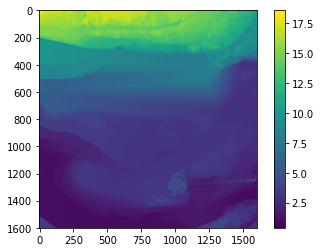

Wrote new world in 1.67s


FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/l3/rnv6k9b97bs5qbdrs5wvrpch0000gn/T/tmp1obcu4lp'

In [101]:
QUERRY_PATH = 'quarry_cropped4_scaled2cm.png'
WORLD_PATH = "./krock2_camera.wbt"

output_path = './test.wbt'
config = { 'height' : 20 , 'resize': 2}

image = cv2.imread(QUERRY_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
image2webots = Image2Webots()
world = image2webots(image, WORLD_PATH, output_path, config)

with open(world.name, 'r') as f:
    print(f[0])